## **Detect fraudulent credit card transactions.*

**STEP 1: Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**STEP 2 : Read the data file**

In [4]:
df= pd.read_csv('/content/fraudTrain.csv')

In [22]:
!head -n 5 /content/fraudTrain.csv

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159046999999994,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,

In [5]:
df.head(3)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0


**STEP 3 : Exploratory Data Analysis**

In [6]:
df.shape

(16326, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16326 entries, 0 to 16325
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             16326 non-null  int64  
 1   trans_date_trans_time  16326 non-null  object 
 2   cc_num                 16326 non-null  float64
 3   merchant               16326 non-null  object 
 4   category               16326 non-null  object 
 5   amt                    16326 non-null  float64
 6   first                  16326 non-null  object 
 7   last                   16326 non-null  object 
 8   gender                 16326 non-null  object 
 9   street                 16326 non-null  object 
 10  city                   16326 non-null  object 
 11  state                  16326 non-null  object 
 12  zip                    16326 non-null  int64  
 13  lat                    16326 non-null  float64
 14  long                   16326 non-null  float64
 15  ci

In [29]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,12258.000000,1.225800e+04,12258.000000,12258.000000,12258.000000,12258.000000,1.225800e+04,1.225700e+04,12257.000000,12257.000000,12257.000000
mean,6128.500000,4.245046e+17,69.463396,49256.547153,38.562799,-90.546034,9.014310e+04,1.325701e+09,38.563288,-90.539562,0.004650
std,3538.724134,1.318933e+18,123.787940,27070.137291,5.163788,14.311214,3.031883e+05,1.926867e+05,5.189768,14.331954,0.068038
min,0.000000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,3064.250000,1.800470e+14,9.780000,26041.000000,34.743700,-97.060900,7.410000e+02,1.325520e+09,34.831263,-97.162161,0.000000
50%,6128.500000,3.521420e+15,48.395000,48438.000000,39.376400,-87.724600,2.408000e+03,1.325716e+09,39.367887,-87.648395,0.000000
75%,9192.750000,4.642260e+15,83.227500,72165.000000,41.846700,-80.175200,1.968500e+04,1.325877e+09,41.893217,-80.247017,0.000000
max,12257.000000,4.992350e+18,5444.240000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325988e+09,66.645176,-66.967742,1.000000


In [30]:
#Check null values
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [8]:
df.dropna()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16320,16320,10-01-2019 16:33,3.725200e+14,"fraud_Reichert, Shanahan and Hayes",shopping_net,219.54,Lori,Ramirez,F,4293 Ramirez Squares,...,48.6031,-93.2977,136,Ceramics designer,20-02-2000,9f03e303fbed3a3c27b726a4efc56c5e,1326213214,49.102421,-94.085485,0.0
16321,16321,10-01-2019 16:34,3.023530e+13,"fraud_O'Reilly, Mohr and Purdy",home,28.48,Kenneth,Doyle,M,8614 Reed Glen,...,41.0592,-73.7395,11250,Lexicographer,16-08-1977,e449bcb94264d3e220301f13d8c72569,1326213262,40.059528,-73.559824,0.0
16322,16322,10-01-2019 16:34,3.556610e+15,fraud_Leannon-Ward,food_dining,1.94,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27-12-1999,debaa0498efd836edee5239c1131309b,1326213299,28.578486,-95.839015,0.0
16323,16323,10-01-2019 16:35,2.131580e+14,"fraud_Schroeder, Hauck and Treutel",entertainment,2.29,Tara,Campbell,F,05050 Rogers Well Apt. 439,...,41.6060,-109.2300,27971,Music therapist,01-08-1984,16605a5dddfa5245ff8d8441e7dd4c83,1326213339,40.718208,-109.248004,0.0


In [32]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0


In [33]:
df['merchant'].value_counts()

fraud_Kilback LLC                        42
fraud_Dickinson Ltd                      41
fraud_Gutmann, McLaughlin and Wiza       39
fraud_Cormier LLC                        37
fraud_Mraz-Herzog                        37
                                         ..
fraud_Hodkiewicz, Prohaska and Paucek     4
fraud_Smitham-Boehm                       3
fraud_Kilback, Nitzsche and Leffler       3
fraud_Medhurst, Labadie and Gottlieb      3
fraud_Kris-Kertzmann                      3
Name: merchant, Length: 693, dtype: int64

In [34]:
#Find out unique categories of transactions
x=df['category'].unique()
x

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [35]:
y=df['category'].value_counts()
y

gas_transport     1280
home              1198
grocery_pos       1196
shopping_pos      1080
kids_pets         1054
shopping_net       907
personal_care      875
entertainment      869
food_dining        860
health_fitness     786
misc_pos           702
misc_net           644
grocery_net        426
travel             381
Name: category, dtype: int64

(array([ 644.,    0.,    0., 1196.,    0.,    0.,    0.,  869.,    0.,
           0.,    0., 1280.,    0.,    0.,    0.,  702.,    0.,    0.,
           0.,  426.,    0.,    0.,    0.,  907.,    0.,    0., 1080.,
           0.,    0.,    0.,  860.,    0.,    0.,    0.,  875.,    0.,
           0.,    0.,  786.,    0.,    0.,    0.,  381.,    0.,    0.,
           0., 1054.,    0.,    0., 1198.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14, 10.4 , 10.66, 10.92, 11.18, 11.44,
        11.7 , 11.96, 12.22, 12.48, 12.74, 13.  ]),
 <BarContainer object of 50 artists>)

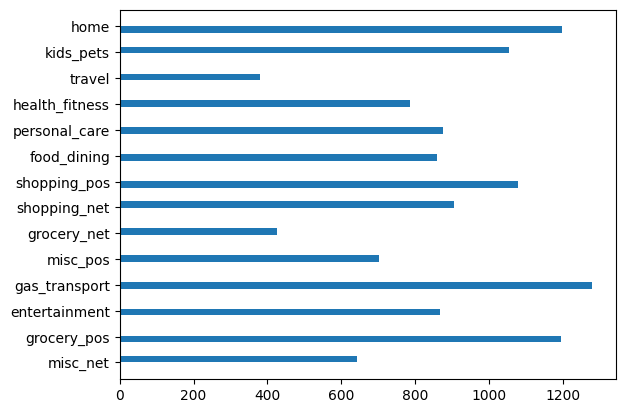

In [36]:
#Graph
plt.hist(df['category'].astype(str),bins=50,orientation='horizontal')

In [37]:
df['gender'].value_counts()

F    6737
M    5521
Name: gender, dtype: int64

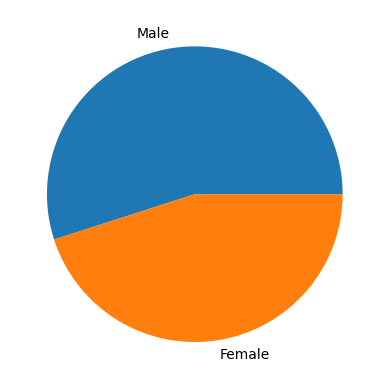

In [38]:
plt.pie (df['gender'].value_counts(),labels=['Male','Female'])
plt.show()


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12258 entries, 0 to 12257
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12258 non-null  int64  
 1   trans_date_trans_time  12258 non-null  object 
 2   cc_num                 12258 non-null  float64
 3   merchant               12258 non-null  object 
 4   category               12258 non-null  object 
 5   amt                    12258 non-null  float64
 6   first                  12258 non-null  object 
 7   last                   12258 non-null  object 
 8   gender                 12258 non-null  object 
 9   street                 12258 non-null  object 
 10  city                   12258 non-null  object 
 11  state                  12258 non-null  object 
 12  zip                    12258 non-null  int64  
 13  lat                    12258 non-null  float64
 14  long                   12258 non-null  float64
 15  ci

In [40]:
df['city'].value_counts()


San Antonio          63
Birmingham           58
Phoenix              57
Warren               55
Thomas               52
                     ..
Linthicum Heights     1
Los Angeles           1
Jackson               1
Michigan              1
Spirit Lake           1
Name: city, Length: 833, dtype: int64

**STEP 4: Feature Transformation**

In [41]:
#columns to drop:
'''
1.unnamed
2.cc_num
3.steet
4.lat
5.long
6.first
7.last
8.merch_lat
9.merch_long
10. unix_time
'''

'\n1.unnamed\n2.cc_num\n3.steet\n4.lat\n5.long\n6.first\n7.last\n8.merch_lat\n9.merch_long\n10. unix_time\n'

In [104]:
df1=df.drop(['cc_num','street','lat','long','first','last','merch_lat','merch_long','unix_time','zip','trans_num'],axis=1)

In [105]:
df1=df1.drop(df1.columns[df1.columns.str.contains('unnamed',case = False)],axis = 1)

In [106]:
df1.dropna()

,trans_date_trans_time,merchant,category,amt,gender,city,state,city_pop,job,dob,is_fraud
0,01-01-2019 00:00,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",09-03-1988,0.0
1,01-01-2019 00:00,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,21-06-1978,0.0
2,01-01-2019 00:00,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,19-01-1962,0.0
3,01-01-2019 00:01,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,12-01-1967,0.0
4,01-01-2019 00:03,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,28-03-1986,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16320,10-01-2019 16:33,"fraud_Reichert, Shanahan and Hayes",shopping_net,219.54,F,Ranier,MN,136,Ceramics designer,20-02-2000,0.0
16321,10-01-2019 16:34,"fraud_O'Reilly, Mohr and Purdy",home,28.48,M,West Harrison,NY,11250,Lexicographer,16-08-1977,0.0
16322,10-01-2019 16:34,fraud_Leannon-Ward,food_dining,1.94,M,Lake Jackson,TX,28739,Futures trader,27-12-1999,0.0
16323,10-01-2019 16:35,"fraud_Schroeder, Hauck and Treutel",entertainment,2.29,F,Rock Springs,WY,27971,Music therapist,01-08-1984,0.0


In [69]:
#df1=df1.drop('zip',axis=1)


,trans_date_trans_time,merchant,category,amt,gender,city,state,city_pop,job,dob,is_fraud
0,01-01-2019 00:00,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",09-03-1988,0.0
1,01-01-2019 00:00,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,21-06-1978,0.0
2,01-01-2019 00:00,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,19-01-1962,0.0
3,01-01-2019 00:01,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,12-01-1967,0.0
4,01-01-2019 00:03,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,28-03-1986,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16320,10-01-2019 16:33,"fraud_Reichert, Shanahan and Hayes",shopping_net,219.54,F,Ranier,MN,136,Ceramics designer,20-02-2000,0.0
16321,10-01-2019 16:34,"fraud_O'Reilly, Mohr and Purdy",home,28.48,M,West Harrison,NY,11250,Lexicographer,16-08-1977,0.0
16322,10-01-2019 16:34,fraud_Leannon-Ward,food_dining,1.94,M,Lake Jackson,TX,28739,Futures trader,27-12-1999,0.0
16323,10-01-2019 16:35,"fraud_Schroeder, Hauck and Treutel",entertainment,2.29,F,Rock Springs,WY,27971,Music therapist,01-08-1984,0.0


In [53]:

df1['amt'].describe()

count    12258.000000
mean        69.463396
std        123.787940
min          1.010000
25%          9.780000
50%         48.395000
75%         83.227500
max       5444.240000
Name: amt, dtype: float64

In [107]:
df1['trans_year'] = pd.to_datetime(df1['trans_date_trans_time']).dt.year

In [108]:
df1.head(1)

,trans_date_trans_time,merchant,category,amt,gender,city,state,city_pop,job,dob,is_fraud,trans_year
0,01-01-2019 00:00,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",09-03-1988,0.0,2019


In [109]:
df1['age'] = df1['trans_year'] - pd.to_datetime(df1['dob']).dt.year

<ipython-input-109-f967c2cc79e9>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['age'] = df1['trans_year'] - pd.to_datetime(df1['dob']).dt.year


In [110]:
df1['age']

0        31
1        41
2        57
3        52
4        33
         ..
16321    42
16322    20
16323    35
16324    36
16325    47
Name: age, Length: 16326, dtype: int64

In [111]:
df1=df1.drop(['city'],axis=1)

In [112]:
df1['age'].describe()

count    16326.000000
mean        46.009678
std         17.450641
min         14.000000
25%         33.000000
50%         44.000000
75%         57.000000
max         95.000000
Name: age, dtype: float64

(array([1091., 2141., 3045., 2945., 2440., 1683., 1304.,  727.,  548.,
         402.]),
 array([14. , 22.1, 30.2, 38.3, 46.4, 54.5, 62.6, 70.7, 78.8, 86.9, 95. ]),
 <BarContainer object of 10 artists>)

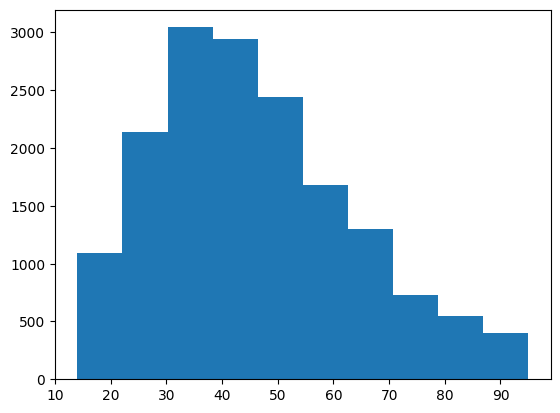

In [77]:
plt.hist(df1['age'],bins=10)

In [78]:
df1.shape

(16326, 12)

In [79]:
#merchant,category,gender,state,job

In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [114]:
encoder = LabelEncoder()
df1["merchant"] = encoder.fit_transform(df1["merchant"])
df1["category"] = encoder.fit_transform(df1["category"])
df1["gender"] = encoder.fit_transform(df1["gender"])
df1["job"] = encoder.fit_transform(df1["job"])



In [115]:
df1=df1.drop(['trans_date_trans_time','dob'],axis=1)
df1.head()

,merchant,category,amt,gender,state,city_pop,job,is_fraud,trans_year,age
0,514,8,4.97,0,NC,3495,356,0.0,2019,31
1,241,4,107.23,0,WA,149,411,0.0,2019,41
2,390,0,220.11,1,ID,4154,294,0.0,2019,57
3,360,2,45.00,1,MT,1939,315,0.0,2019,52
4,297,9,41.96,1,VA,99,110,0.0,2019,33


In [116]:
df1['state'] =encoder.fit_transform(df1['state'])

In [117]:
df1.head()

,merchant,category,amt,gender,state,city_pop,job,is_fraud,trans_year,age
0,514,8,4.97,0,26,3495,356,0.0,2019,31
1,241,4,107.23,0,46,149,411,0.0,2019,41
2,390,0,220.11,1,12,4154,294,0.0,2019,57
3,360,2,45.00,1,25,1939,315,0.0,2019,52
4,297,9,41.96,1,44,99,110,0.0,2019,33


In [89]:
df1.shape

(16326, 10)

**STEP 5 : Model Training**

In [125]:
df1=df1.dropna()

In [127]:
X=df1.drop('is_fraud',axis=1)

In [126]:
y =df1['is_fraud']

In [128]:
X

,merchant,category,amt,gender,state,city_pop,job,trans_year,age
0,514,8,4.97,0,26,3495,356,2019,31
1,241,4,107.23,0,46,149,411,2019,41
2,390,0,220.11,1,12,4154,294,2019,57
3,360,2,45.00,1,25,1939,315,2019,52
4,297,9,41.96,1,44,99,110,2019,33
...,...,...,...,...,...,...,...,...,...
16320,504,11,219.54,0,22,136,60,2019,19
16321,461,6,28.48,1,33,11250,256,2019,42
16322,378,1,1.94,1,42,28739,197,2019,20
16323,567,0,2.29,0,49,27971,291,2019,35


In [129]:
y.unique()

array([0., 1.])

In [130]:
model = SVC()
model.fit(X,y)

SVC()

In [131]:
model.score(X,y)

0.9936906584992343